In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from fastai.tabular import add_datepart

from sklearn.linear_model import LinearRegression
from scipy.stats import mannwhitneyu, norm, rankdata

import matplotlib.pyplot as plt

#### Carregando o arquivo com os dados de acumulados mensais para o período de 2002 a 2017 para minha região de interesse

In [2]:
file_nc="C:/Users/Carol/Documents/PEC/Dissertacao/JupyterNotebooks/Precipitacao MERGE/MERGE_2002_2017_v2.nc"

* Lendo o arquivo netcdf com o Xarray

In [3]:
merge = xr.open_dataset(file_nc)
merge

<xarray.Dataset>
Dimensions:  (lat: 51, lon: 24, time: 192)
Coordinates:
  * time     (time) datetime64[ns] 2002-01-31 2002-02-28 ... 2017-12-31
  * lat      (lat) float32 -20.199886 -19.999886 ... -10.399849 -10.199848
  * lon      (lon) float32 -47.599197 -47.399193 ... -43.199097 -42.999092
Data variables:
    prec     (time, lat, lon) float32 ...

* Transformando num Pandas dataframe

In [4]:
df=merge.to_dataframe()

In [5]:
df

prec
lat        lon        time                  
-20.199886 -47.599197 2002-01-31  233.349106
                      2002-02-28  305.280884
                      2002-03-31  147.982559
                      2002-04-30   21.564001
                      2002-05-31   48.665405
...                                      ...
-10.199848 -42.999092 2017-08-31    0.000000
                      2017-09-30    0.000000
                      2017-10-31    2.134650
                      2017-11-30   92.022911
                      2017-12-31  102.978104

[235008 rows x 1 columns]

* Fazendo média no tempo

,prec
time,
2002-01-31,253.458679
2002-02-28,178.510147
2002-03-31,101.256203
2002-04-30,39.682453
2002-05-31,24.190506
...,...
2017-08-31,0.354837
2017-09-30,5.674481
2017-10-31,34.297775


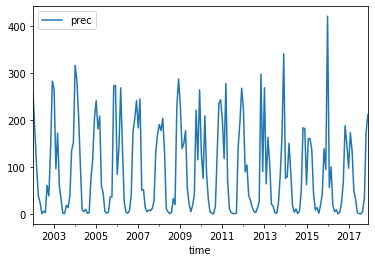

In [6]:
media_t= df.groupby('time').mean()
media_t.plot()
media_t

In [7]:
#media_t.to_csv('serie_tws.csv')

In [8]:
media_t=media_t.reset_index()
media_t

,time,prec
0,2002-01-31,253.458679
1,2002-02-28,178.510147
2,2002-03-31,101.256203
3,2002-04-30,39.682453
4,2002-05-31,24.190506
...,...,...
187,2017-08-31,0.354837
188,2017-09-30,5.674481
189,2017-10-31,34.297775
190,2017-11-30,173.567886


In [9]:
add_datepart(media_t,'time',drop=False)
media_t

,time,prec,timeYear,timeMonth,timeWeek,timeDay,timeDayofweek,timeDayofyear,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,timeElapsed
0,2002-01-31,253.458679,2002,1,5,31,3,31,True,False,False,False,False,False,1012435200
1,2002-02-28,178.510147,2002,2,9,28,3,59,True,False,False,False,False,False,1014854400
2,2002-03-31,101.256203,2002,3,13,31,6,90,True,False,True,False,False,False,1017532800
3,2002-04-30,39.682453,2002,4,18,30,1,120,True,False,False,False,False,False,1020124800
4,2002-05-31,24.190506,2002,5,22,31,4,151,True,False,False,False,False,False,1022803200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2017-08-31,0.354837,2017,8,35,31,3,243,True,False,False,False,False,False,1504137600
188,2017-09-30,5.674481,2017,9,39,30,5,273,True,False,True,False,False,False,1506729600
189,2017-10-31,34.297775,2017,10,44,31,1,304,True,False,False,False,False,False,1509408000
190,2017-11-30,173.567886,2017,11,48,30,3,334,True,False,False,False,False,False,1512000000


In [10]:
media_t.index= media_t['time']
media_t

,time,prec,timeYear,timeMonth,timeWeek,timeDay,timeDayofweek,timeDayofyear,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,timeElapsed
time,,,,,,,,,,,,,,,
2002-01-31,2002-01-31,253.458679,2002,1,5,31,3,31,True,False,False,False,False,False,1012435200
2002-02-28,2002-02-28,178.510147,2002,2,9,28,3,59,True,False,False,False,False,False,1014854400
2002-03-31,2002-03-31,101.256203,2002,3,13,31,6,90,True,False,True,False,False,False,1017532800
2002-04-30,2002-04-30,39.682453,2002,4,18,30,1,120,True,False,False,False,False,False,1020124800
2002-05-31,2002-05-31,24.190506,2002,5,22,31,4,151,True,False,False,False,False,False,1022803200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31,2017-08-31,0.354837,2017,8,35,31,3,243,True,False,False,False,False,False,1504137600
2017-09-30,2017-09-30,5.674481,2017,9,39,30,5,273,True,False,True,False,False,False,1506729600
2017-10-31,2017-10-31,34.297775,2017,10,44,31,1,304,True,False,False,False,False,False,1509408000


In [11]:
media_t=media_t.drop(['timeDayofweek','timeDayofyear','timeIs_month_end','timeIs_month_start','timeIs_quarter_end','timeIs_quarter_start','timeIs_year_end','timeIs_year_start','timeElapsed','time','timeWeek','timeDay'], axis=1)
media_t

,prec,timeYear,timeMonth
time,,,
2002-01-31,253.458679,2002,1
2002-02-28,178.510147,2002,2
2002-03-31,101.256203,2002,3
2002-04-30,39.682453,2002,4
2002-05-31,24.190506,2002,5
...,...,...,...
2017-08-31,0.354837,2017,8
2017-09-30,5.674481,2017,9
2017-10-31,34.297775,2017,10


#### Cálculo das médias mensais para todo o período estudado 
As médias mensais(Jan a Dez) para todo o intervalo foram determinadas.
O valor médio para os doze meses do ano no intervalo estudado foi então subtraído por cada mês de toda a série, e essa diferença então foi considerada a anomalia de precipitação para o período de 2002 a 2017.  

In [12]:
serie_clim=[]

for i in range(1,13): 
    serie_clim.append(media_t[media_t.index.month==i].mean())
    i =+1

In [13]:
df_serie_clim = pd.DataFrame(serie_clim)
df_serie_clim['timeYear']= np.nan
#df_serie_clim['lwe_thickness'].plot()
df_serie_clim

,prec,timeYear,timeMonth
0,202.782760,NaN,1.0
1,141.290232,NaN,2.0
2,166.158722,NaN,3.0
3,84.742384,NaN,4.0
4,25.193568,NaN,5.0
5,6.984888,NaN,6.0
6,4.583766,NaN,7.0
7,4.850907,NaN,8.0
8,22.038983,NaN,9.0
9,75.370653,NaN,10.0


In [14]:
#df_serie_clim.to_csv('meses_tws.csv')

In [16]:
media_t.reset_index(drop = True, inplace = True)
media_t.sort_values(by=['timeYear','timeMonth'])


,prec,timeYear,timeMonth
0,253.458679,2002,1
1,178.510147,2002,2
2,101.256203,2002,3
3,39.682453,2002,4
4,24.190506,2002,5
...,...,...,...
187,0.354837,2017,8
188,5.674481,2017,9
189,34.297775,2017,10
190,173.567886,2017,11


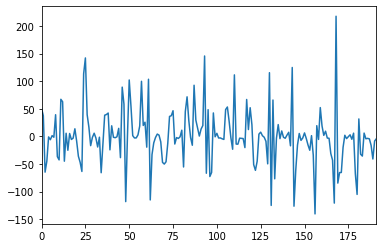

In [17]:
diferenca = []
for index, row in media_t.iterrows():
    mes = row['timeMonth']
    tws = row['prec']
    media = float(df_serie_clim[df_serie_clim['timeMonth']==mes]['prec'])
    diferenca.append(tws-media)
media_diferenca = media_t.copy()
media_diferenca['diferenca'] = diferenca
media_diferenca['diferenca'].plot()

In [18]:
#media_diferenca.to_csv('anomalia_tws.csv')

### Aplicação dos testes

##### Código do teste Pettitt passado pelo professor

In [19]:
def pettitt_daniel(data):
    m = data.size
    data1= []
    v = []
    V = []    
    for t in data: 
        for j in data:
            data1 = np.append(data1,((t)-j))
    v = np.sign(data1).reshape((m,m))
    V= np.sum(v,axis=1)
    U = np.cumsum(V)
    loc = np.where(abs(U)== max(abs(U)))
    K = max(abs(U))
    pvalue = np.multiply(2,(np.exp((np.multiply(-6,(np.power(K,2))/(np.power(m,3)+np.power(m,2)))))))
    return(loc, K, pvalue)

In [20]:
pettitt_daniel(media_diferenca['diferenca'])

((array([120], dtype=int64),), 2253.0, 0.02766620354144816)

In [21]:
pettitt_daniel(media_diferenca['prec'])

((array([111], dtype=int64),), 1260.0, 0.5242928759604427)

In [22]:
pettitt_daniel(media_diferenca[media_diferenca['timeMonth']==1]['diferenca'])

((array([3], dtype=int64),), 34.0, 0.40632464550306346)

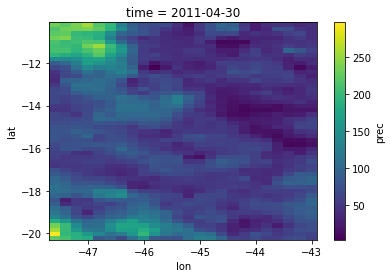

In [23]:
merge.data_vars['prec'].isel(time=111).plot()

#### Aplicação dos testes Man Kendall e Sen's Slope (Como Sun et al., (2016), Oliveira et al., (2014) e Yang et al., (2017))

##### Aplicando o teste Mann-Kendall do módulo pymannkendall (https://pypi.org/project/pymannkendall/)

In [24]:
import pymannkendall as mk

In [25]:
mk.original_test(media_diferenca['diferenca'][0:120])

Mann_Kendall_Test(trend='no trend', h=False, p=0.4749206724662183, z=0.7144957674337002, Tau=0.044257703081232495, s=316.0, var_s=194366.66666666666, slope=0.06250070035457611)

In [26]:
mk.original_test(media_diferenca['diferenca'][120:])

Mann_Kendall_Test(trend='no trend', h=False, p=0.24927359025181262, z=-1.1521155592385224, Tau=-0.09311424100156494, s=-238.0, var_s=42316.0, slope=-0.11065076900149697)

In [27]:
mk.original_test(media_diferenca['prec'][:111])

Mann_Kendall_Test(trend='no trend', h=False, p=0.5108697465532701, z=0.6574840140725854, Tau=0.04242424242424243, s=259.0, var_s=153981.66666666666, slope=0.09216187363964017)

In [28]:
mk.original_test(media_diferenca['prec'][111:])

Mann_Kendall_Test(trend='no trend', h=False, p=0.9707196966014913, z=-0.03670565881742973, Tau=-0.0030864197530864196, s=-10.0, var_s=60120.0, slope=-0.0054672901434732486)